In [1]:
data =  [{
    'accuracy': {'mean': 0.7, 'std': 0.007232651792330201}, 
    'dp': {'mean': 0.1, 'std': 0.03739326113474983}, 
    'eo': {'mean': 0.1, 'std': 0.03739326113474983}}, 
    
    {'accuracy': {'mean': 0.6, 'std': 0.005673758865248235}, 
     'dp': {'mean': 0.3, 'std': 0.05165583169118099}, 
     'eo': {'mean': 0.3, 'std': 0.05165583169118099}}, 
    
    {'accuracy': {'mean': 0.4, 'std': 0.005673758865248235}, 
     'dp': {'mean': 0.4, 'std': 0.051886509305676884}, 
     'eo': {'mean': 0.4, 'std': 0.051886509305676884}}, 
    
    {'accuracy': {'mean': 0.5, 'std': 0.003474453535862669}, 
     'dp': {'mean': 0.25, 'std': 0.011293848786315635}, 
     'eo': {'mean': 0.25, 'std': 0.011293848786315635}}
]

In [10]:
import matplotlib.pyplot as plt


def get_pareto_front(data, fairness_metric='dp'):
    accuracy = np.array([d['accuracy']['mean'] for d in data])
    dp = np.array([d[fairness_metric]['mean'] for d in data])

    accuracy_norm = (accuracy - accuracy.min()) / (accuracy.max() - accuracy.min())
    dp_norm = (dp - dp.min()) / (dp.max() - dp.min())

    is_efficient = np.ones(data.__len__(), dtype=bool)
    for i, c in enumerate(zip(accuracy_norm, dp_norm)):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(np.array(list(zip(accuracy_norm, dp_norm)))[is_efficient] <= c, axis=1)
            is_efficient[i] = True

    pareto_front = []
    for i, d in enumerate(data):
        if is_efficient[i]:
            pareto_front.append(d)

    return pareto_front


def visualize_pareto_front(
    data,
    fairness_metric='dp',
    filename='pareto_front.png'
):
    sorted_data = sorted(
        data,
        key=lambda x: (-x['accuracy']['mean'], x[fairness_metric]['mean'])
    )
    
    accuracy = [item['accuracy']['mean'] for item in sorted_data]
    dp = [item[fairness_metric]['mean'] for item in sorted_data]

    plt.figure(figsize=(10, 6))
    plt.scatter(accuracy, dp, color='b')
    plt.plot(accuracy, dp, color='r')

    plt.xlabel('Accuracy')
    plt.ylabel('DP')
    plt.title('Pareto Front')

    plt.show()

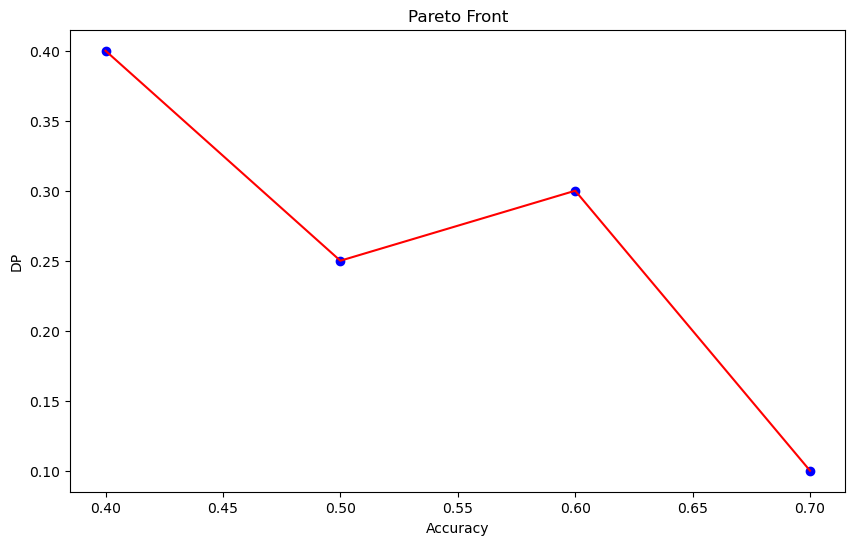

In [11]:
visualize_pareto_front(data)

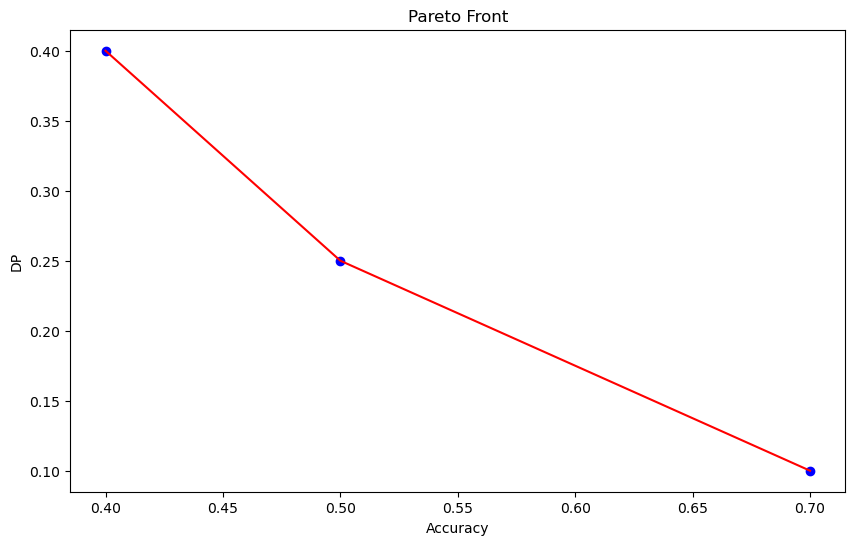

In [12]:
visualize_pareto_front(get_pareto_front(data))